# 상권 분석

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 한글 폰트 설정
plt.rc("font", family='NanumGothic')
plt.rc("axes", unicode_minus=False)

In [3]:
# 레티나 디스플레이로 폰트가 선명하게 표시되도록 함
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [4]:
dir_path="data/"
file_list=os.listdir(dir_path)
file_list

['소상공인시장진흥공단_상가(상권)정보_강원_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_경기_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_경남_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_경북_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_광주_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_대구_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_대전_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_부산_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_서울_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_세종_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_울산_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_인천_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_전남_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_전북_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_제주_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_충남_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_충북_202012.csv']

In [5]:
#city=[['서울','seoul'],['부산','busan']]
city=['서울','부산']
df=pd.DataFrame()
for i in file_list:
    for j in city:
        if j in i:
            temp=pd.read_csv(dir_path+i,sep="|")
            df=pd.concat([df,temp])
            del temp
df.reset_index(drop=True, inplace=True)

In [6]:
# 모든 컬럼이 표시되도록 max_columns의 수를 지정
pd.options.display.max_columns = len(df.columns)

In [7]:
df

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,17175332,정성밥상,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,26,부산광역시,26350,해운대구,2635051000,우1동,2635010500,우동,2635010500205520002,1,대지,552,2.0,부산광역시 해운대구 우동 552-2,263502006010,부산광역시 해운대구 해운대로,635,7.0,2635010500105520002023290,NaN,부산광역시 해운대구 해운대로 635-7,612819,48087.0,NaN,NaN,NaN,129.159641,35.164474
1,23206623,미광장,NaN,O,숙박,O02,모텔/여관/여인숙,O02A01,모텔/여관/여인숙,I55112,여관업,26,부산광역시,26110,중구,2611056000,부평동,2611012600,부평동4가,2611012600200250001,1,대지,25,1.0,부산광역시 중구 부평동4가 25-1,261104175163,부산광역시 중구 보수대로44번길,5,NaN,2611012600100250001004473,NaN,부산광역시 중구 보수대로44번길 5,600074,48974.0,NaN,NaN,NaN,129.023668,35.100979
2,20418637,BHC치킨,동래점,Q,음식,Q05,닭/오리요리,Q05A08,후라이드/양념치킨,I56193,치킨 전문점,26,부산광역시,26260,동래구,2626052000,복산동,2626010500,복천동,2626010500201850000,1,대지,185,NaN,부산광역시 동래구 복천동 185,262604190058,부산광역시 동래구 동래로147번길,18,NaN,2626010500101850000016529,NaN,부산광역시 동래구 동래로147번길 18,607020,47802.0,NaN,NaN,NaN,129.087156,35.205267
3,24659633,스텔라,NaN,D,소매,D05,의복의류,D05A01,일반의류,G47416,셔츠 및 기타 의복 소매업,26,부산광역시,26500,수영구,2650067000,남천2동,2650010500,남천동,2650010500201480004,1,대지,148,4.0,부산광역시 수영구 남천동 148-4,265003138005,부산광역시 수영구 광안해변로,100,NaN,2650010500101480004001694,비치아파트,부산광역시 수영구 광안해변로 100,613751,48305.0,NaN,NaN,20,129.115397,35.143770
4,17174094,도란도란,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,26,부산광역시,26230,부산진구,2623074000,개금1동,2623011100,개금동,2623011100201740004,1,대지,174,4.0,부산광역시 부산진구 개금동 174-4,262304187020,부산광역시 부산진구 가야대로482번길,29,3.0,2623011100101740004050547,NaN,부산광역시 부산진구 가야대로482번길 29-3,614813,47327.0,NaN,NaN,NaN,129.024938,35.151645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488526,17222727,현대기림,NaN,D,소매,D10,건강/미용식품,D10A04,건강식품판매,G47216,건강보조식품 소매업,11,서울특별시,11200,성동구,1120065000,성수1가1동,1120011400,성수동1가,1120011400202760017,1,대지,276,17.0,서울특별시 성동구 성수동1가 276-17,112003103010,서울특별시 성동구 뚝섬로,366,72.0,1120011400102760017009013,NaN,서울특별시 성동구 뚝섬로 366-72,133819,4775.0,NaN,NaN,NaN,127.051154,37.539464
488527,17222723,본현대미아점,NaN,D,소매,D10,건강/미용식품,D10A04,건강식품판매,G47216,건강보조식품 소매업,11,서울특별시,11290,성북구,1129068500,길음2동,1129013400,길음동,1129013400200200001,1,대지,20,1.0,서울특별시 성북구 길음동 20-1,112903107003,서울특별시 성북구 동소문로,315,NaN,1129013400100200001025204,현대백화점미아점,서울특별시 성북구 동소문로 315,136719,2730.0,NaN,5,NaN,127.028726,37.608392
488528,17219564,오피스알파,약장수,D,소매,D10,건강/미용식품,D10A04,건강식품판매,G47216,건강보조식품 소매업,11,서울특별시,11305,강북구,1130563500,수유3동,1130510300,수유동,1130510300200360037,1,대지,36,37.0,서울특별시 강북구 수유동 36-37,113054124005,서울특별시 강북구 노해로17길,62,1.0,1130510300100360037035171,NaN,서울특별시 강북구 노해로17길 62-1,142872,1075.0,NaN,NaN,101,127.018733,37.640485
488529,17219761,앤클라인뉴욕핸드백,NaN,D,소매,D06,가방/신발/액세서리,D06A10,가방/가죽제품소매,G47430,가방 및 기타 가죽제품 소매업,11,서울특별시,11530,구로구,1153056000,구로5동,1153010200,구로동,1153010200205730000,1,대지,573,NaN,서울특별시 구로구 구로동 573,115303116005,서울특별시 구로구 구로중앙로,152,NaN,1153010200105730000020642,NC백화점,서울특별시 구로구 구로중앙로 152,152715,8292.0,NaN,1,NaN,126.882409,37.501378


### 인덱스 정보 보기

In [8]:
df.index

RangeIndex(start=0, stop=488531, step=1)

### 컬럼명 보기

In [9]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

# 결측치 확인하기

In [10]:
import missingno as msno
True==1

True

## 데이터 프레임 결측치 시각화

<AxesSubplot:>

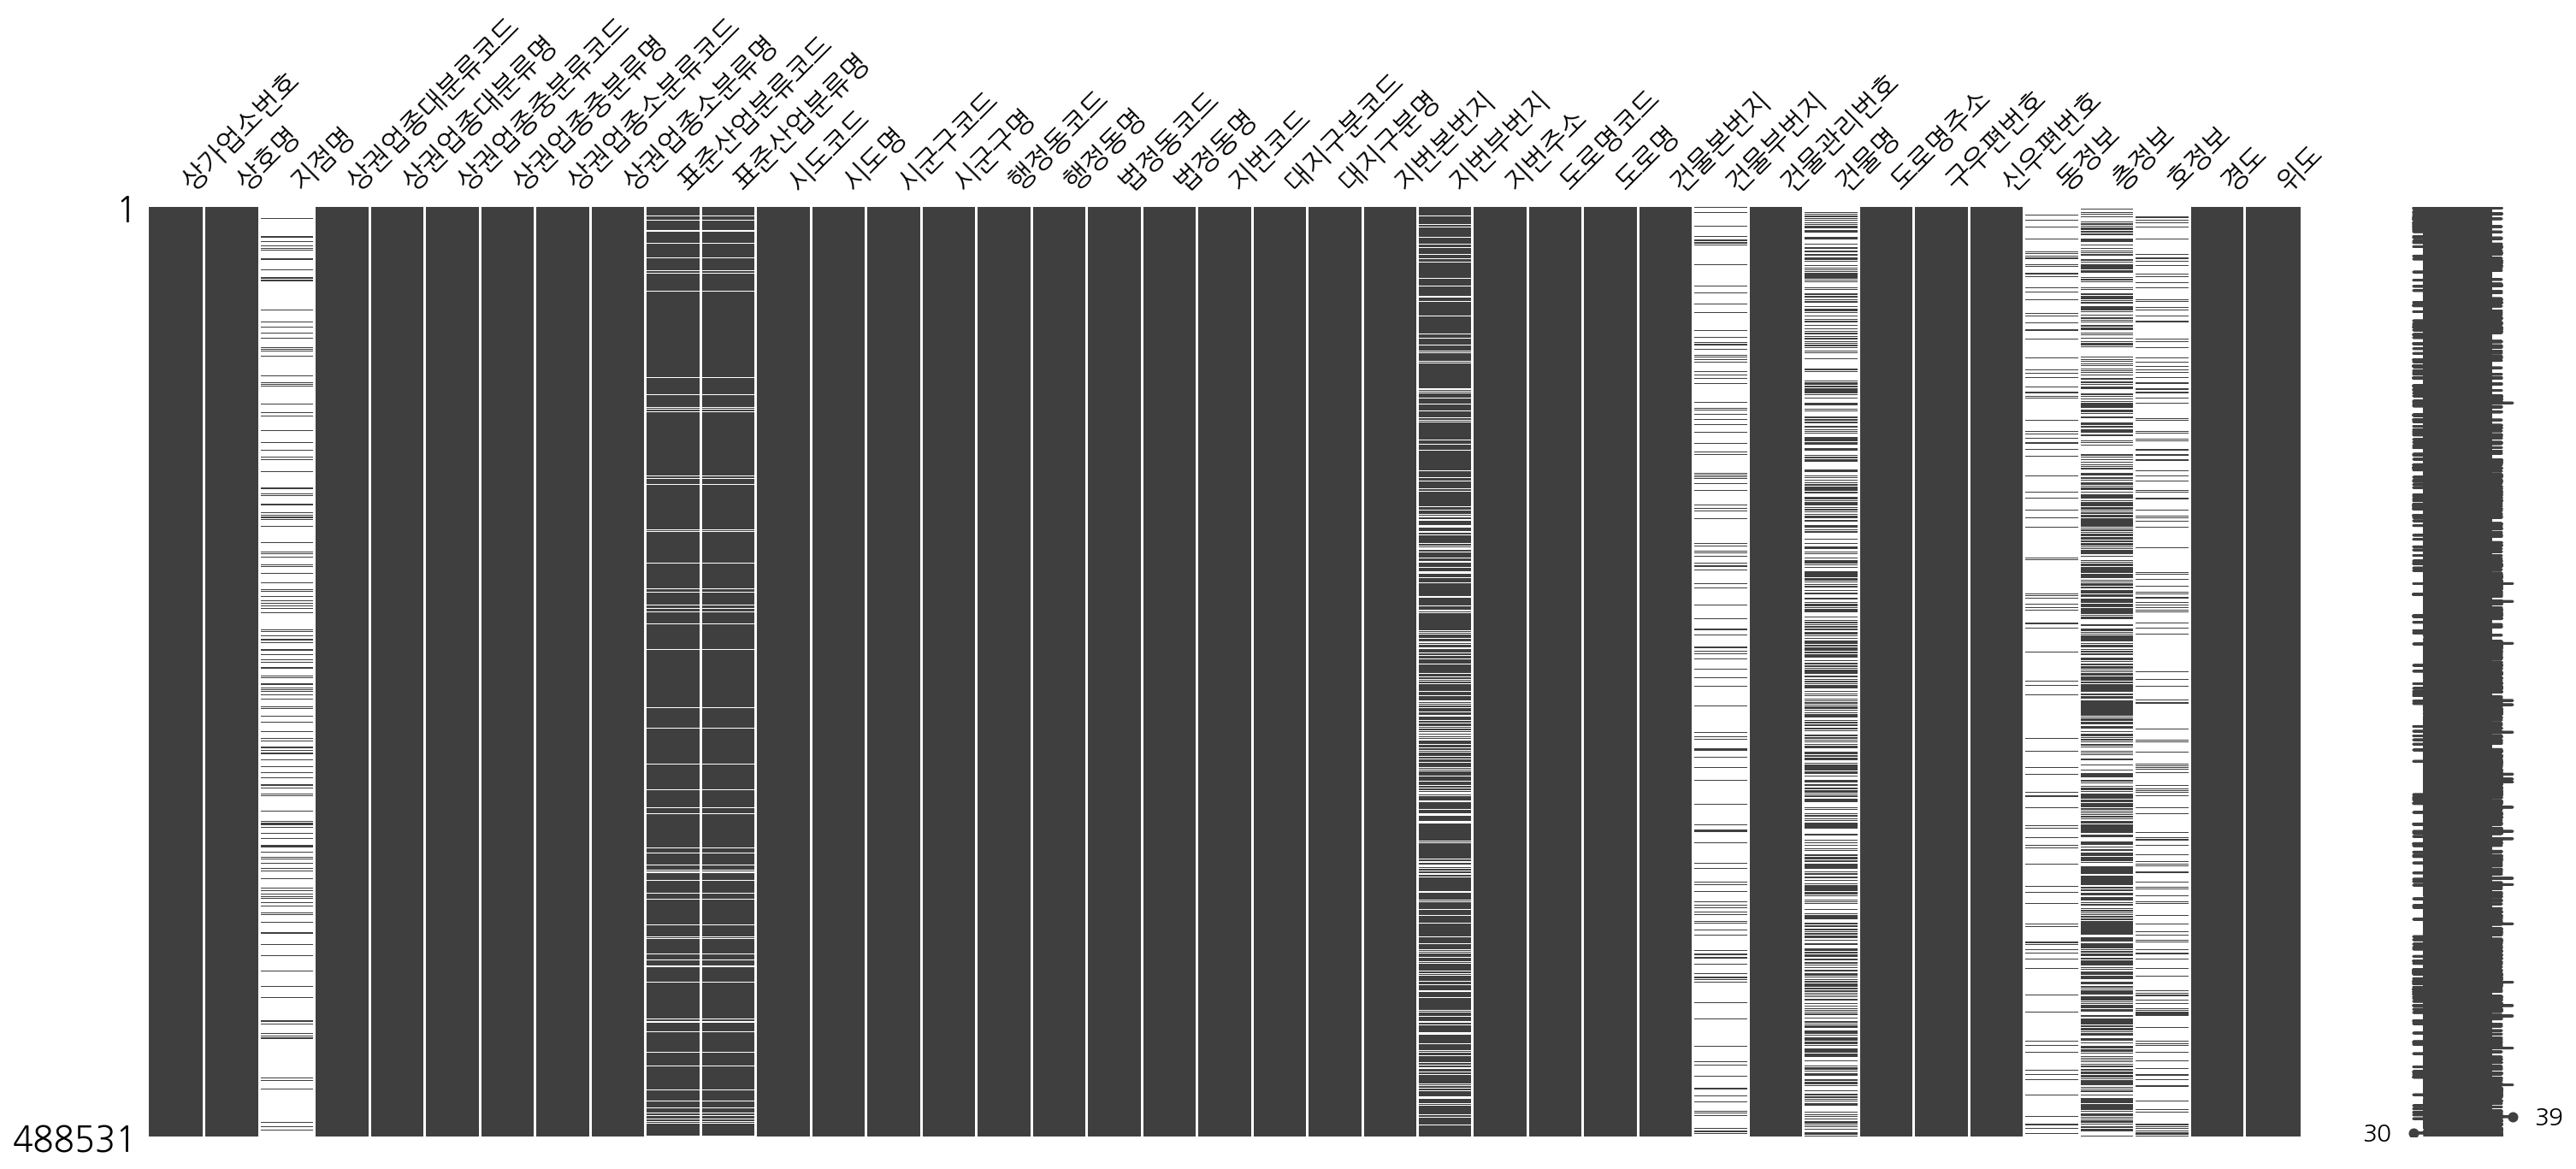

In [11]:
msno.matrix(df)

+ 하얀 부분이 결측치

<AxesSubplot:>

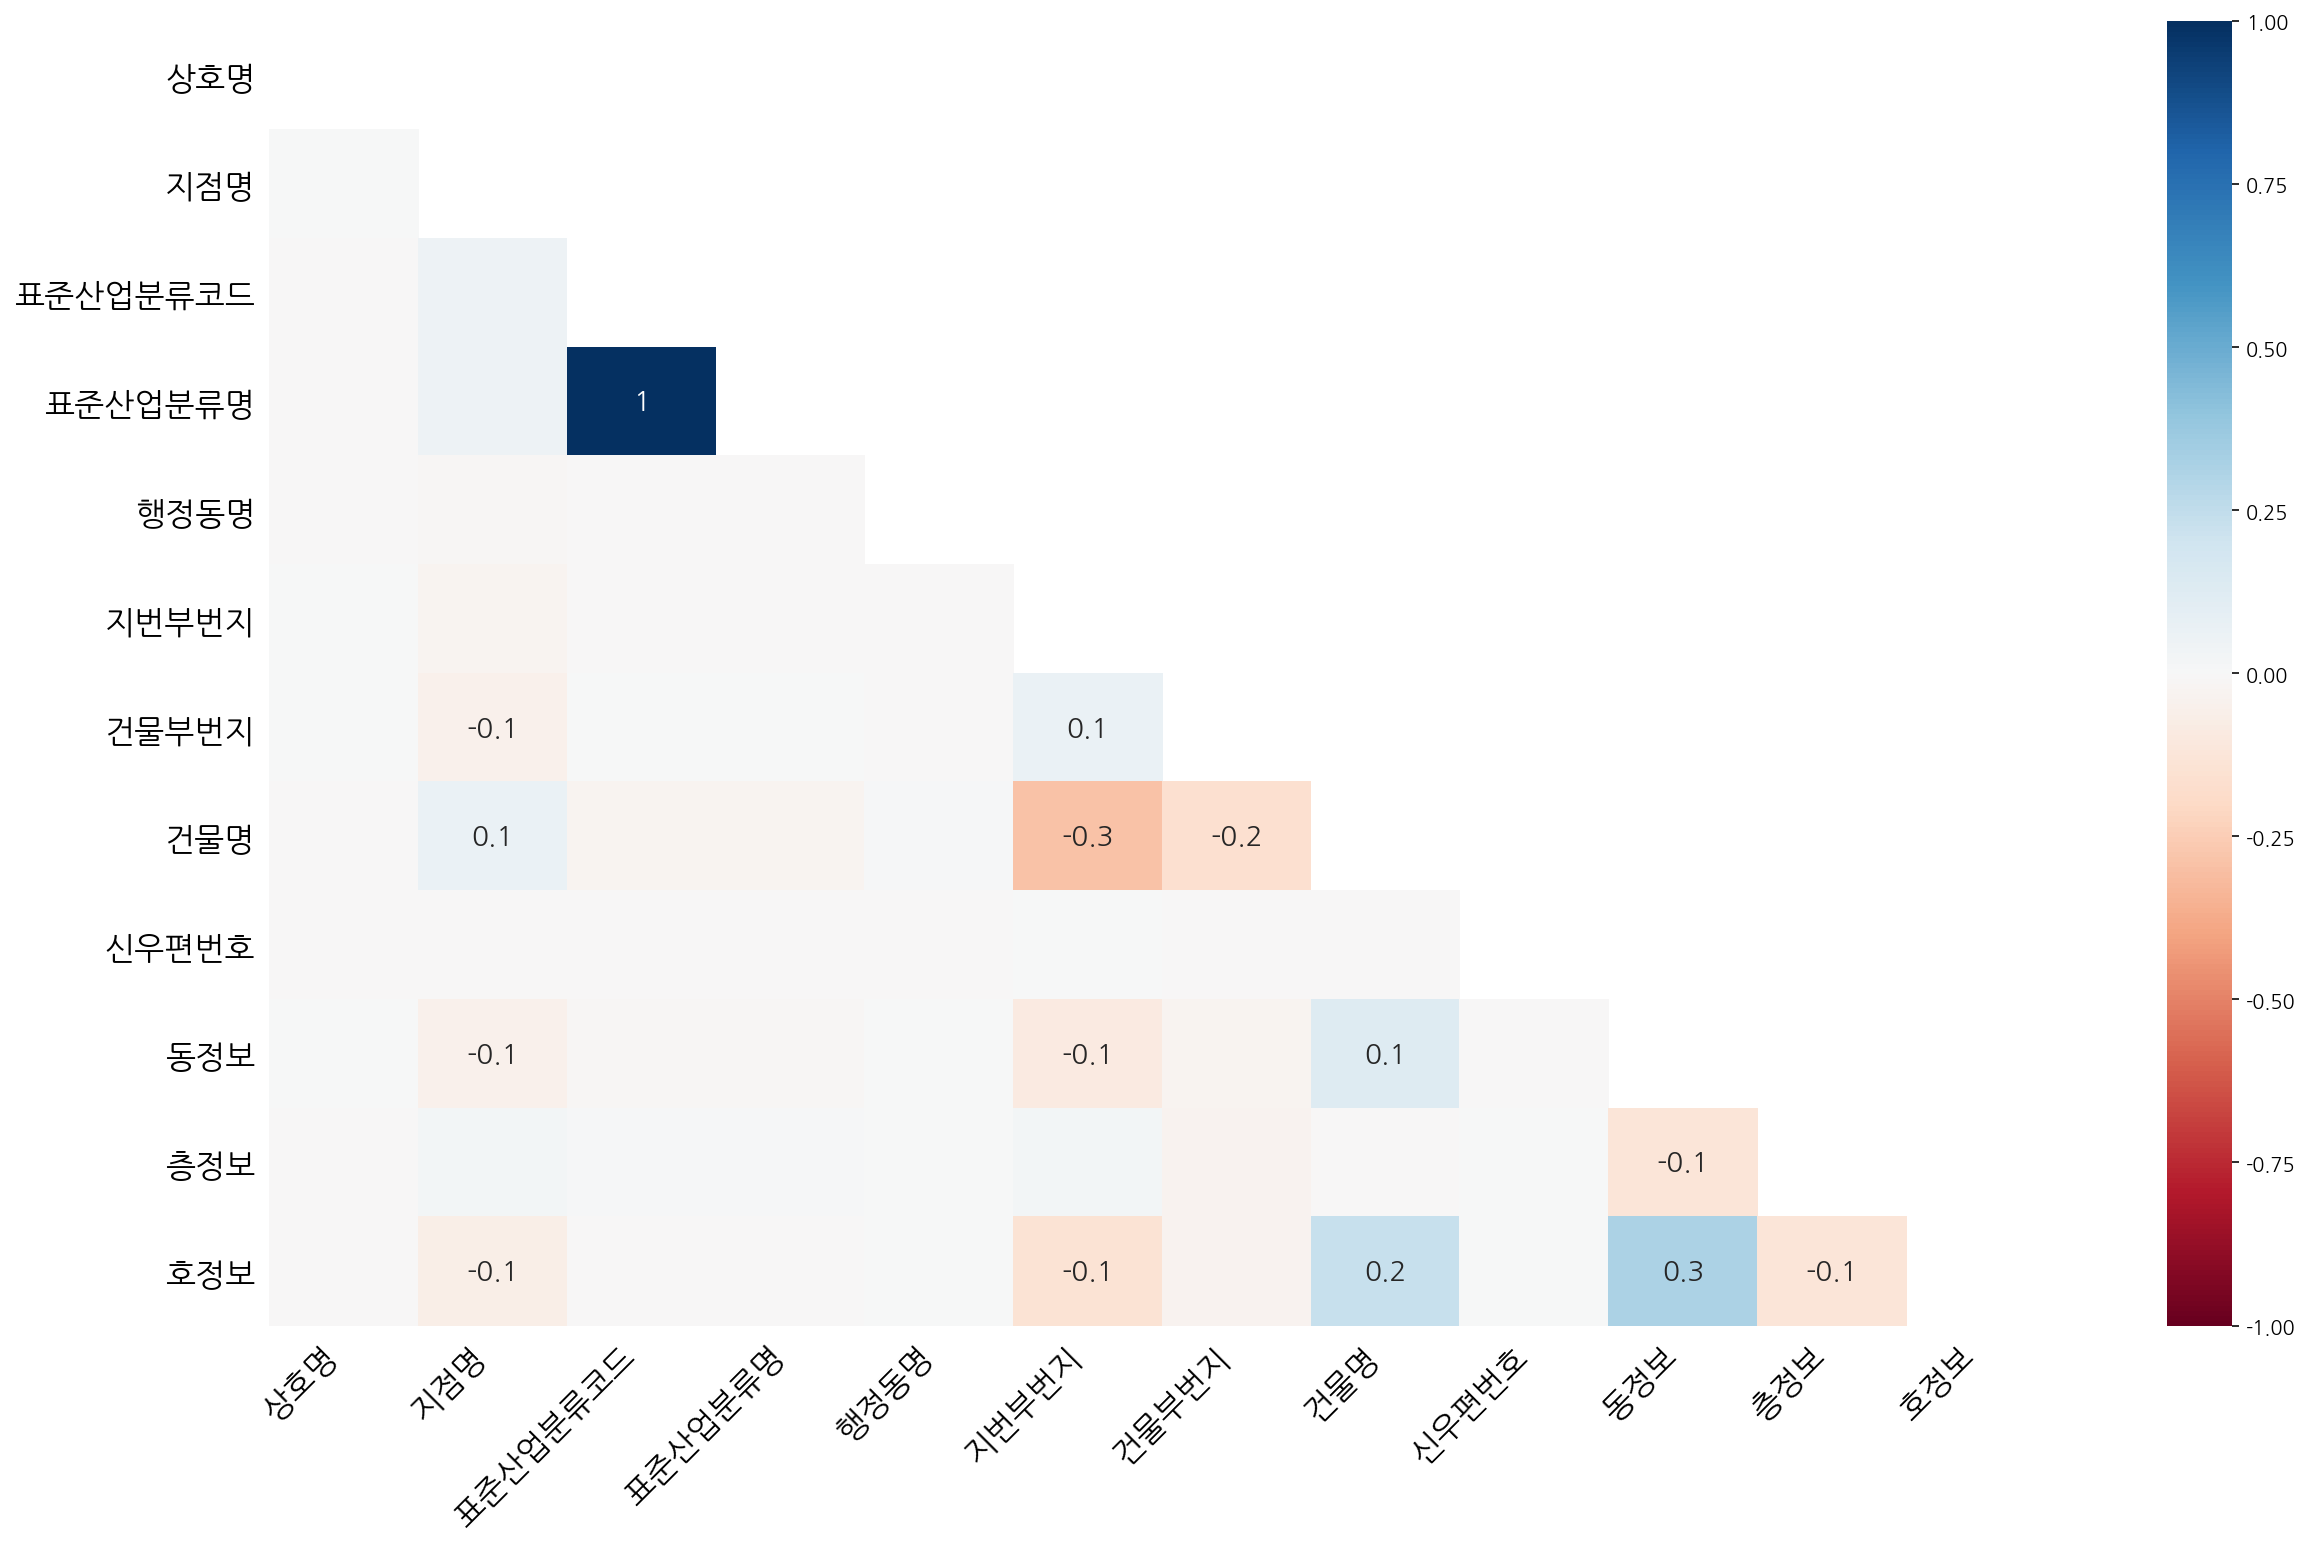

In [12]:
msno.heatmap(df)

<AxesSubplot:title={'center':'<결측치>'}>

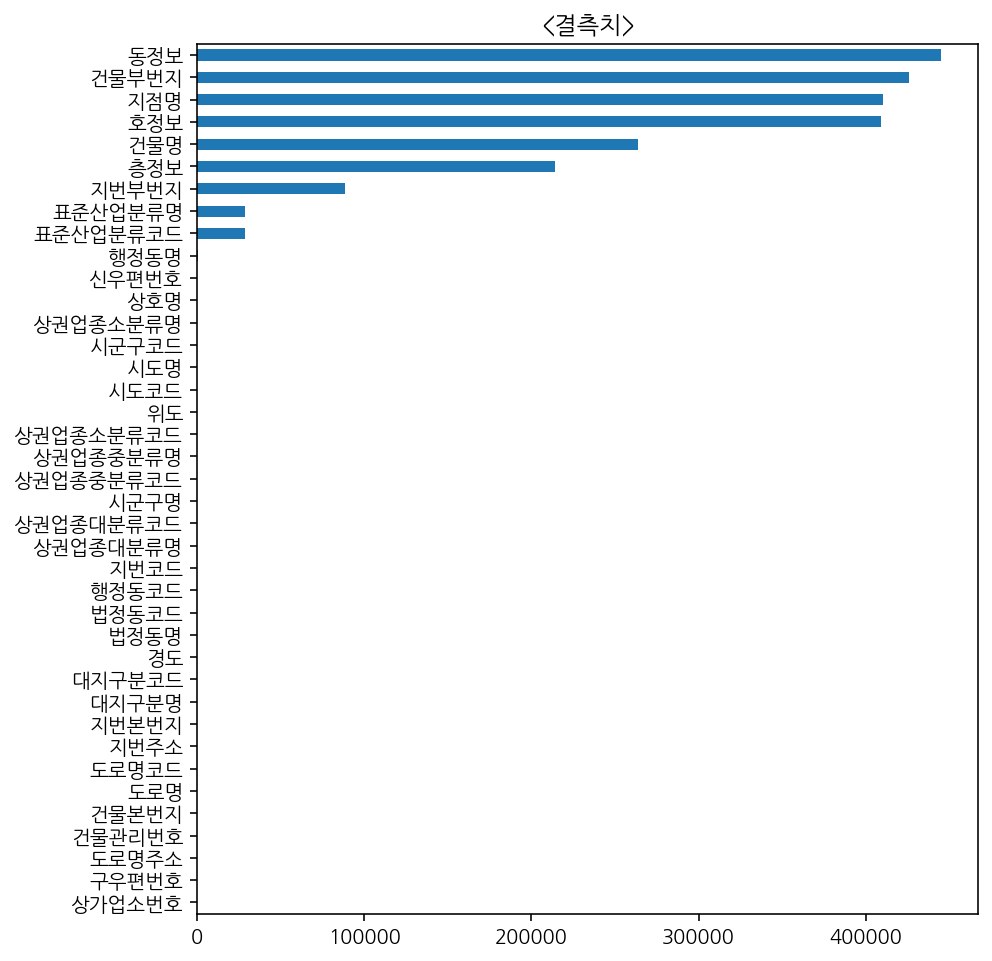

In [13]:
n=df.isnull().sum()
plt.title('<결측치>')
n.sort_values().plot.barh(figsize=(7, 8))

## 결측치가 많은 컬럼이나 사용하지 않는 컬럼 제거

### 결측치가 너무 많은 컬럼 제거

In [14]:
# sort_values 를 통해 결측치가 많은 데이터를 위에서 9개 가져와서 not_use 변수로 저장
# not_use 변수에 담긴 인덱스값만 추출해서 not_use_col 변수로 저장
not_use = n.sort_values(ascending=False).head(9)
not_use_col = not_use.index
not_use_col

Index(['동정보', '건물부번지', '지점명', '호정보', '건물명', '층정보', '지번부번지', '표준산업분류코드',
       '표준산업분류명'],
      dtype='object')

In [15]:
# 사용하지 않는 컬럼을 제거
df = df.drop(not_use_col, axis=1)

### 사용하지 않는 컬럼 제거

In [16]:
# 컬럼명을 전처리 하기 위해 cols 라는 변수에 저장
cols = df.columns
cols

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드',
       '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소',
       '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도',
       '위도'],
      dtype='object')

In [17]:
# 컬럼명에 "코드", "번호"가 있지만 분석에 필요하지 않기 때문에 
# '코드'와 '번호'를 포함하고 있는 컬럼 찾아와서 cols_code 라는 변수에 저장
cols_code = cols[cols.str.contains("코드|번호")]
cols_code

Index(['상가업소번호', '상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '시도코드', '시군구코드',
       '행정동코드', '법정동코드', '지번코드', '대지구분코드', '도로명코드', '건물관리번호', '구우편번호',
       '신우편번호'],
      dtype='object')

In [18]:
# "코드", "번호" 가 들어가는 컬럼명만 drop으로 데이터프레임에서 제거
df = df.drop(cols_code, axis=1)

In [19]:
df

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,정성밥상,음식,한식,한식/백반/한정식,부산광역시,해운대구,우1동,우동,대지,552,부산광역시 해운대구 우동 552-2,부산광역시 해운대구 해운대로,635,부산광역시 해운대구 해운대로 635-7,129.159641,35.164474
1,미광장,숙박,모텔/여관/여인숙,모텔/여관/여인숙,부산광역시,중구,부평동,부평동4가,대지,25,부산광역시 중구 부평동4가 25-1,부산광역시 중구 보수대로44번길,5,부산광역시 중구 보수대로44번길 5,129.023668,35.100979
2,BHC치킨,음식,닭/오리요리,후라이드/양념치킨,부산광역시,동래구,복산동,복천동,대지,185,부산광역시 동래구 복천동 185,부산광역시 동래구 동래로147번길,18,부산광역시 동래구 동래로147번길 18,129.087156,35.205267
3,스텔라,소매,의복의류,일반의류,부산광역시,수영구,남천2동,남천동,대지,148,부산광역시 수영구 남천동 148-4,부산광역시 수영구 광안해변로,100,부산광역시 수영구 광안해변로 100,129.115397,35.143770
4,도란도란,음식,한식,한식/백반/한정식,부산광역시,부산진구,개금1동,개금동,대지,174,부산광역시 부산진구 개금동 174-4,부산광역시 부산진구 가야대로482번길,29,부산광역시 부산진구 가야대로482번길 29-3,129.024938,35.151645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488526,현대기림,소매,건강/미용식품,건강식품판매,서울특별시,성동구,성수1가1동,성수동1가,대지,276,서울특별시 성동구 성수동1가 276-17,서울특별시 성동구 뚝섬로,366,서울특별시 성동구 뚝섬로 366-72,127.051154,37.539464
488527,본현대미아점,소매,건강/미용식품,건강식품판매,서울특별시,성북구,길음2동,길음동,대지,20,서울특별시 성북구 길음동 20-1,서울특별시 성북구 동소문로,315,서울특별시 성북구 동소문로 315,127.028726,37.608392
488528,오피스알파,소매,건강/미용식품,건강식품판매,서울특별시,강북구,수유3동,수유동,대지,36,서울특별시 강북구 수유동 36-37,서울특별시 강북구 노해로17길,62,서울특별시 강북구 노해로17길 62-1,127.018733,37.640485
488529,앤클라인뉴욕핸드백,소매,가방/신발/액세서리,가방/가죽제품소매,서울특별시,구로구,구로5동,구로동,대지,573,서울특별시 구로구 구로동 573,서울특별시 구로구 구로중앙로,152,서울특별시 구로구 구로중앙로 152,126.882409,37.501378


# 분석

## 기술 통계

In [20]:
df.describe()

,지번본번지,건물본번지,경도,위도
count,488531.000000,488531.000000,488531.000000,488531.000000
mean,478.886153,146.970796,127.597360,36.853261
std,503.103931,268.741625,0.943631,1.081753
min,1.000000,0.000000,126.768169,35.006760
25%,113.000000,19.000000,126.962537,35.216233
50%,337.000000,48.000000,127.047500,37.510699
75%,684.000000,157.000000,128.987599,37.560432
max,9999.000000,3318.000000,129.292243,37.690787


### 단변량 수치형 변수 시각화

<AxesSubplot:title={'center':'<위도>'}, xlabel='위도', ylabel='Density'>

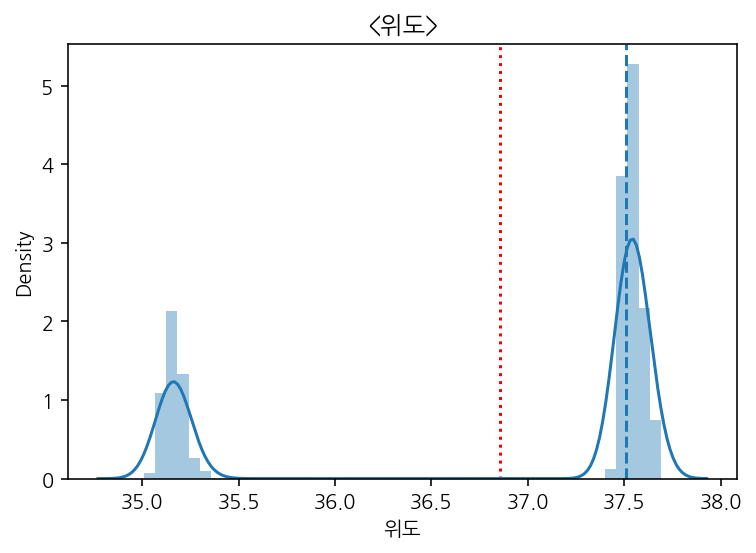

In [21]:
# 위도의 distplot
plt.title('<위도>')
plt.axvline(df["위도"].mean(), linestyle=":", color="r") #평균
plt.axvline(df["위도"].median(), linestyle="--") #중앙값
sns.distplot(df["위도"])

<AxesSubplot:title={'center':'<경도>'}, xlabel='경도', ylabel='Density'>

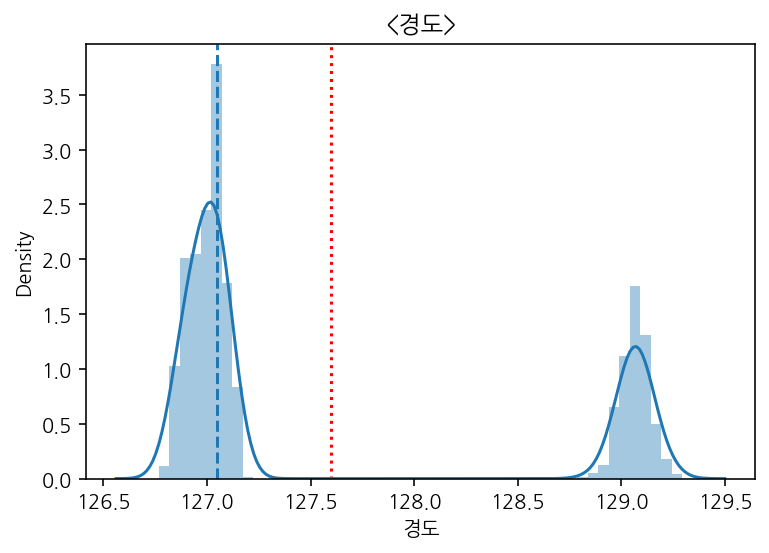

In [22]:
# 경도의 distplot
plt.title('<경도>')
plt.axvline(df["경도"].mean(), linestyle=":", color="r") #평균
plt.axvline(df["경도"].median(), linestyle="--") #중앙값
sns.distplot(df["경도"])

## 상관계수
* [상관 분석](https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D)
* r 값은 X 와 Y 가 완전히 동일하면 +1, 전혀 다르면 0, 반대방향으로 완전히 동일 하면 –1 을 가진다.
* 결정계수(coefficient of determination) 는 r ** 2 로 계산하며 이것은 X 로부터 Y 를 예측할 수 있는 정도를 의미한다.
    * r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
    * r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
    * r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
    * r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
    * r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
    * r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
    * r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계
    
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/800px-Correlation_examples2.svg.png" width="600">

In [23]:
# 각 변수의 상관계수
corr = df.corr()
corr

,지번본번지,건물본번지,경도,위도
지번본번지,1.000000,0.048808,0.193297,-0.209592
건물본번지,0.048808,1.000000,0.001484,0.003518
경도,0.193297,0.001484,1.000000,-0.994459
위도,-0.209592,0.003518,-0.994459,1.000000


<AxesSubplot:title={'center':'상관계수 시각화'}>

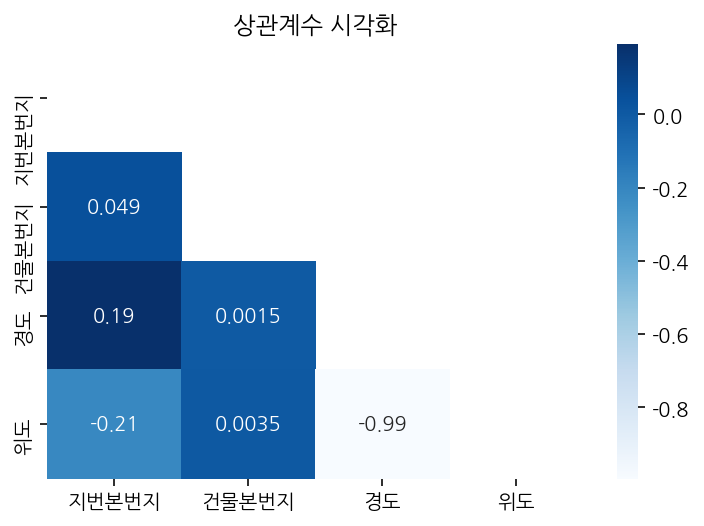

In [24]:
# 상관계수 시각화
plt.title('상관계수 시각화')
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, annot=True, cmap="Blues", mask=mask)

<AxesSubplot:title={'center':'서울특별시의 상관계수 시각화'}>

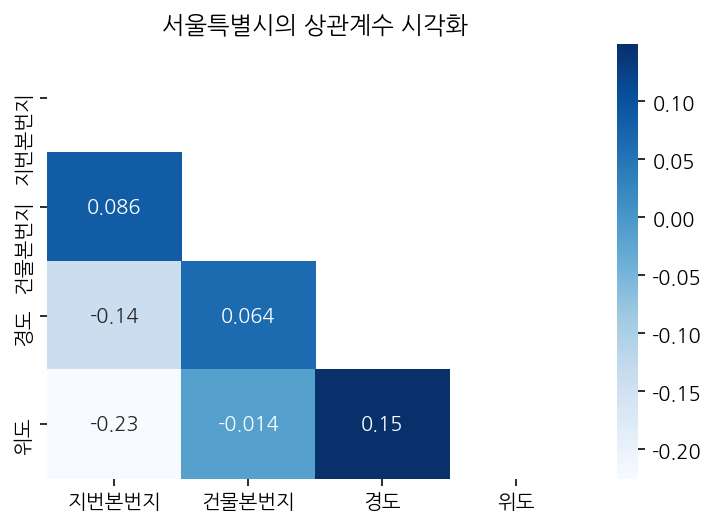

In [25]:
# 각 변수의 상관계수
corr_seoul = df[df['시도명']=='서울특별시'].corr()
# 상관계수 시각화
plt.title('서울특별시의 상관계수 시각화')
mask_seoul = np.triu(np.ones_like(corr_seoul, dtype=np.bool))
sns.heatmap(corr_seoul, annot=True, cmap="Blues", mask=mask_seoul)

<AxesSubplot:title={'center':'부산광역시의 상관계수 시각화'}>

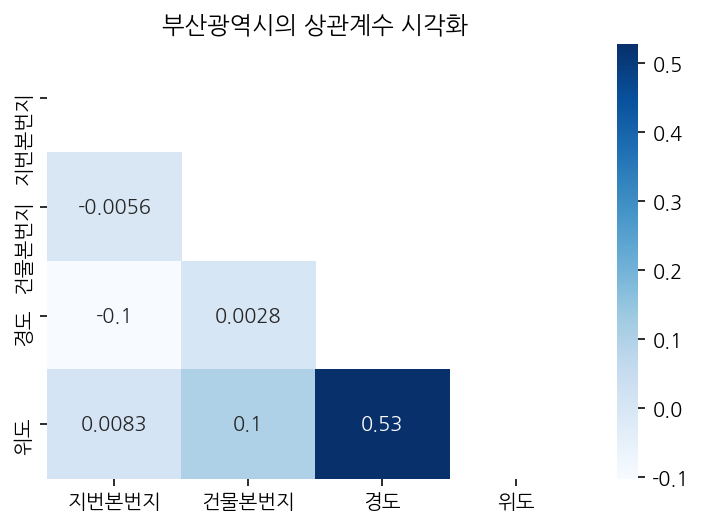

In [26]:
# 각 변수의 상관계수
corr_busan = df[df['시도명']=='부산광역시'].corr()
# 상관계수 시각화
plt.title('부산광역시의 상관계수 시각화')
mask_busan = np.triu(np.ones_like(corr_busan, dtype=np.bool))
sns.heatmap(corr_busan, annot=True, cmap="Blues", mask=mask_busan)

## 산점도로 이변량 수치형 변수 표현

<AxesSubplot:title={'center':'서울특별시 산점도'}, xlabel='경도', ylabel='위도'>

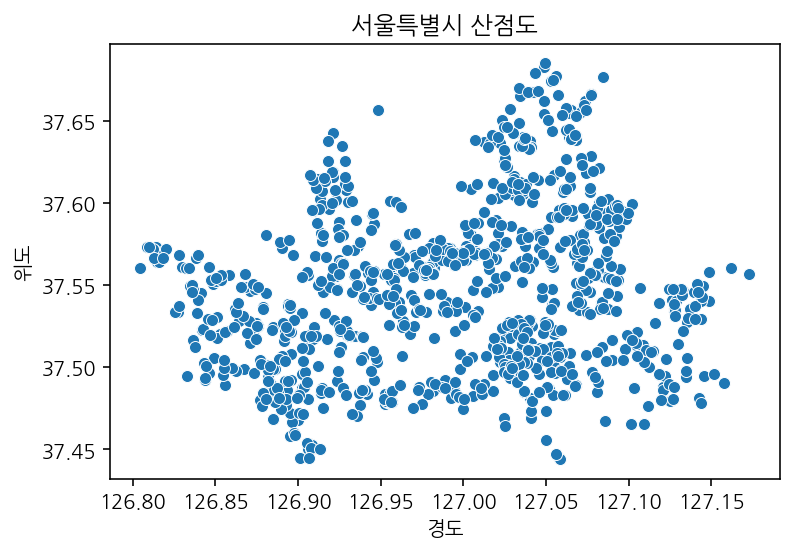

In [27]:
plt.title('서울특별시 산점도')
sns.scatterplot(data=df[df['시도명']=='서울특별시'].sample(1000),x="경도",y="위도")

<AxesSubplot:title={'center':'부산광역시 산점도'}, xlabel='경도', ylabel='위도'>

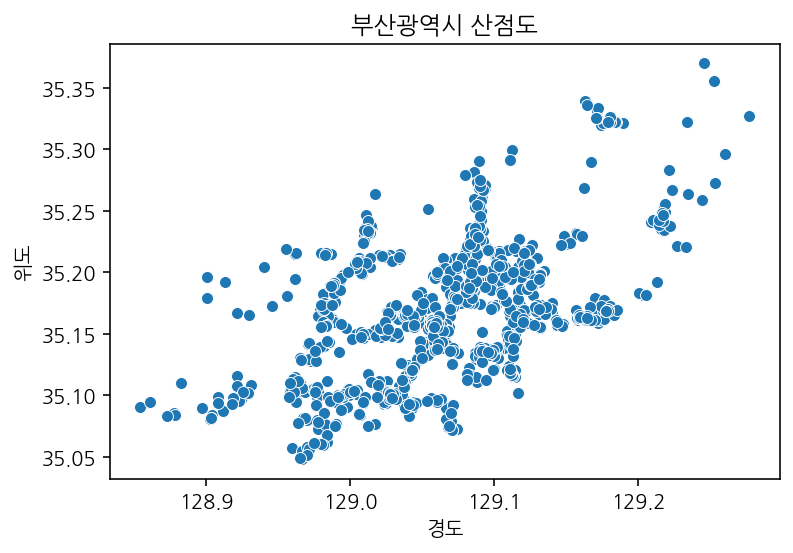

In [28]:
plt.title('부산광역시 산점도')
sns.scatterplot(data=df[df['시도명']=='부산광역시'].sample(1000),x="경도",y="위도")

<AxesSubplot:title={'center':'산점도 : 경도 & 위도'}, xlabel='경도', ylabel='위도'>

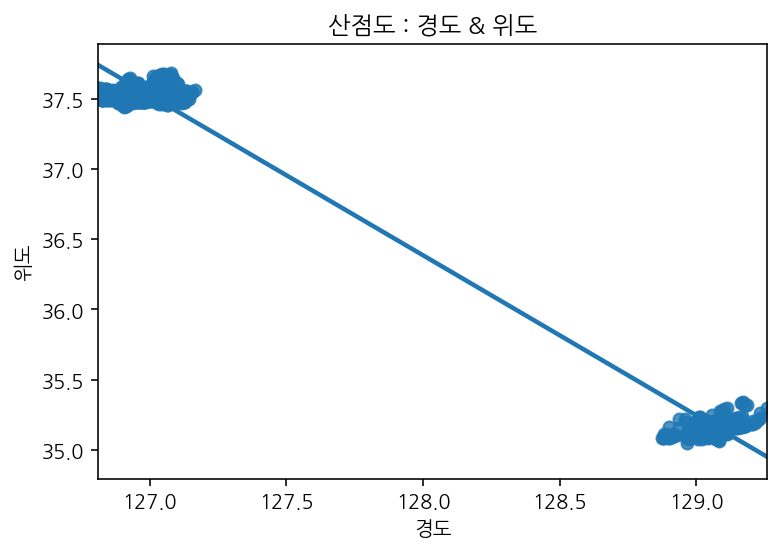

In [29]:
# scatterplot 으로 경도와 위도를 표현,
# 데이터의 갯수가 많으면 오래 걸리기 때문에 1000 개의 샘플을 추출해서 그림
# 회귀선을 그림
plt.title('산점도 : 경도 & 위도')
sns.regplot(data=df.sample(1000), x="경도", y="위도")

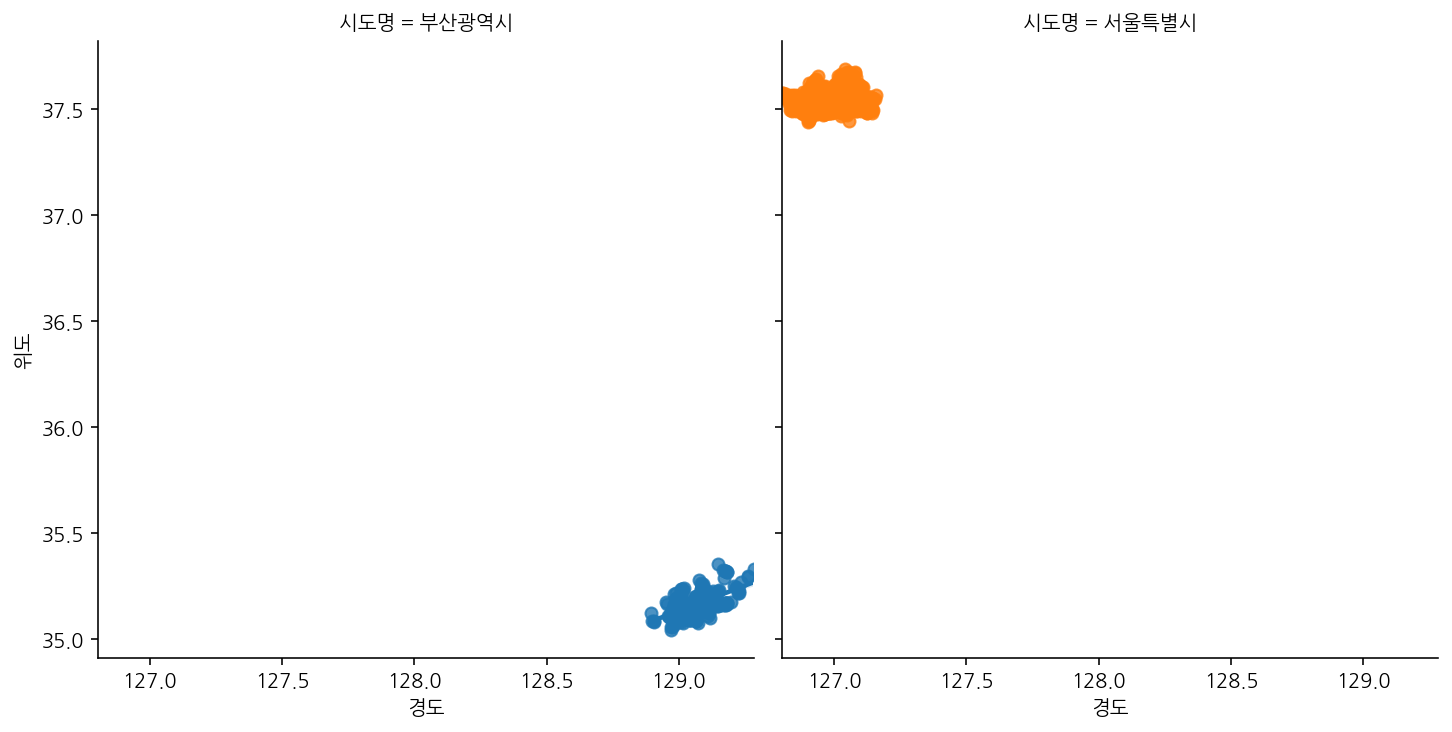

In [30]:
# 회귀선을 그리는 그래프의 서브플롯을 그립니다.
sns.lmplot(data=df.sample(1000), x="경도", y="위도", hue="시도명", col="시도명", fit_reg=True)

## object 타입의 데이터 요약

In [31]:
# include="object" 로 문자열 데이터에 대한 요약
df.describe(include="object")

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소
count,488529,488531,488531,488531,488531,488531,488212,488531,488531,488531,488531,488531
unique,326836,8,93,690,2,39,630,647,2,182611,18010,183066
top,CU,음식,한식,한식/백반/한정식,서울특별시,강남구,역삼1동,역삼동,대지,부산광역시 부산진구 부전동 503-15,서울특별시 서초구 신반포로,부산광역시 부산진구 가야대로 772
freq,2654,187294,62634,43953,346577,37482,7589,9132,487778,1029,2408,1029


## 상권업종대분류명의 요약값과 빈도수

In [32]:
# 상권업종대분류명의 요약값
df["상권업종대분류명"].describe()

count     488531
unique         8
top           음식
freq      187294
Name: 상권업종대분류명, dtype: object

In [33]:
# 상권업종대분류명의 빈도수
df["상권업종대분류명"].value_counts()

음식          187294
소매          148358
생활서비스        82671
학문/교육        34474
부동산          19124
관광/여가/오락     11234
숙박            4411
스포츠            965
Name: 상권업종대분류명, dtype: int64

## 스타벅스 상권

In [34]:
df_starbucks=df[(df["상호명"]=="스타벅스")].copy()
df_starbucks

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
3161,스타벅스,음식,커피점/카페,커피전문점/카페/다방,부산광역시,동구,초량3동,초량동,대지,1199,부산광역시 동구 초량동 1199-9,부산광역시 동구 중앙대로,216,부산광역시 동구 중앙대로 216,129.040831,35.116346
6269,스타벅스,음식,커피점/카페,커피전문점/카페/다방,부산광역시,연제구,연산4동,연산동,대지,603,부산광역시 연제구 연산동 603-10,부산광역시 연제구 반송로,20,부산광역시 연제구 반송로 20,129.083344,35.186967
7113,스타벅스,음식,커피점/카페,커피전문점/카페/다방,부산광역시,연제구,연산5동,연산동,대지,1242,부산광역시 연제구 연산동 1242-12,부산광역시 연제구 중앙대로,1091,부산광역시 연제구 중앙대로 1091,129.080677,35.185431
8263,스타벅스,음식,커피점/카페,커피전문점/카페/다방,부산광역시,사하구,하단1동,하단동,대지,618,부산광역시 사하구 하단동 618-2,부산광역시 사하구 낙동대로,455,부산광역시 사하구 낙동대로 455,128.968878,35.105350
10566,스타벅스,음식,커피점/카페,커피전문점/카페/다방,부산광역시,사하구,하단2동,하단동,대지,526,부산광역시 사하구 하단동 526-5,부산광역시 사하구 낙동남로,1411,부산광역시 사하구 낙동남로 1411,128.966073,35.106500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481017,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,잠원동,잠원동,대지,37,서울특별시 서초구 잠원동 37-7,서울특별시 서초구 강남대로,557,서울특별시 서초구 강남대로 557,127.020628,37.511534
482643,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,종로구,이화동,동숭동,대지,1,서울특별시 종로구 동숭동 1-38,서울특별시 종로구 동숭길,133,서울특별시 종로구 동숭길 133,127.002716,37.583360
483063,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,반포4동,반포동,대지,52,서울특별시 서초구 반포동 52-6,서울특별시 서초구 서초중앙로,225,서울특별시 서초구 서초중앙로 225,127.011539,37.501655
483179,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,대지,736,서울특별시 강남구 역삼동 736-1,서울특별시 강남구 테헤란로,142,서울특별시 강남구 테헤란로 142,127.034941,37.499740


<AxesSubplot:title={'center':'서울특별시의 스타벅스'}, xlabel='경도', ylabel='위도'>

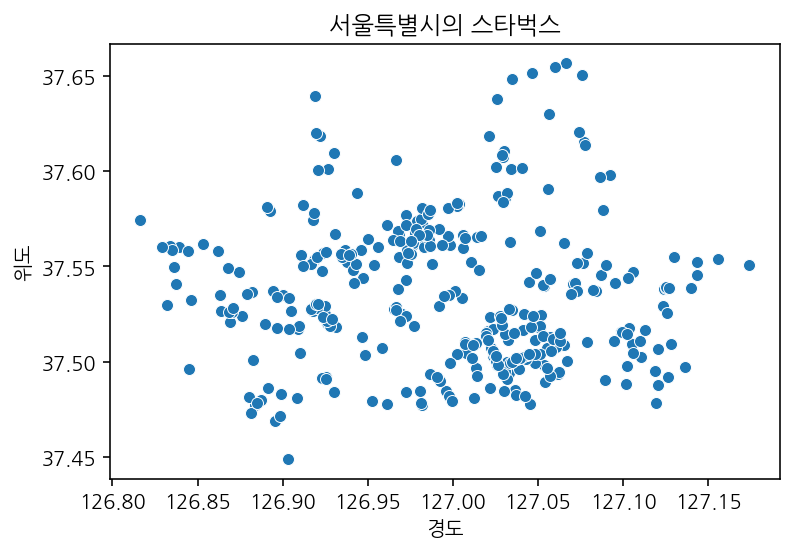

In [35]:
plt.title('서울특별시의 스타벅스')
sns.scatterplot(data=df_starbucks[df_starbucks['시도명']=='서울특별시'],x="경도",y="위도") #,hue="시군구명")

<AxesSubplot:title={'center':'부산광역시의 스타벅스'}, xlabel='경도', ylabel='위도'>

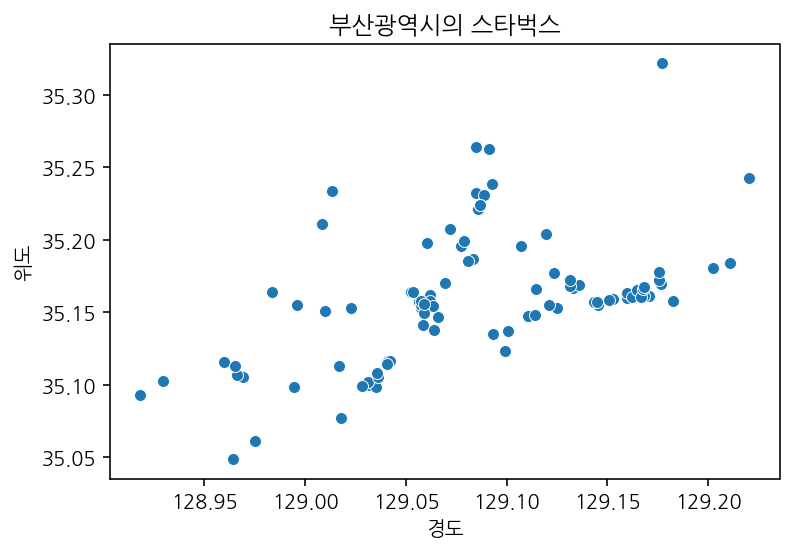

In [36]:
plt.title('부산광역시의 스타벅스')
sns.scatterplot(data=df_starbucks[df_starbucks['시도명']=='부산광역시'],x="경도",y="위도")

In [37]:
df_starbucks['시도명'].value_counts()

서울특별시    346
부산광역시     96
Name: 시도명, dtype: int64

In [38]:
starbucks_seoul=df_starbucks[(df_starbucks["시도명"]=="서울특별시")].copy()
starbucks_seoul["시군구명"].value_counts()

강남구     59
서초구     33
중구      30
영등포구    24
종로구     20
송파구     19
용산구     17
마포구     17
광진구     14
강서구     13
서대문구    13
강동구     12
양천구     10
성북구     10
금천구      8
동작구      7
성동구      7
관악구      6
은평구      6
중랑구      5
노원구      5
구로구      4
동대문구     3
강북구      2
도봉구      2
Name: 시군구명, dtype: int64

In [39]:
starbucks_busan=df_starbucks[(df_starbucks["시도명"]=="부산광역시")].copy()
starbucks_busan["시군구명"].value_counts()

해운대구    26
부산진구    15
사하구      7
금정구      7
중구       6
수영구      6
동구       5
연제구      4
남구       4
동래구      4
사상구      3
기장군      3
서구       2
북구       2
강서구      2
Name: 시군구명, dtype: int64

In [40]:
#"시군구명"으로 그룹화를 하고 "상호명"으로 빈도수를 계산
g_starbucks_seoul = starbucks_seoul.groupby(["시군구명"])["상호명"].count()
g_starbucks_seoul = g_starbucks_seoul.reset_index()
g_starbucks_seoul.columns = ["시군구명", "매장수"]
g_starbucks_busan = starbucks_busan.groupby(["시군구명"])["상호명"].count()
g_starbucks_busan = g_starbucks_busan.reset_index()
g_starbucks_busan.columns = ["시군구명", "매장수"]

<AxesSubplot:title={'center':'서울특별시의 스타벅스 자치구별 매장수'}, xlabel='시군구명', ylabel='매장수'>

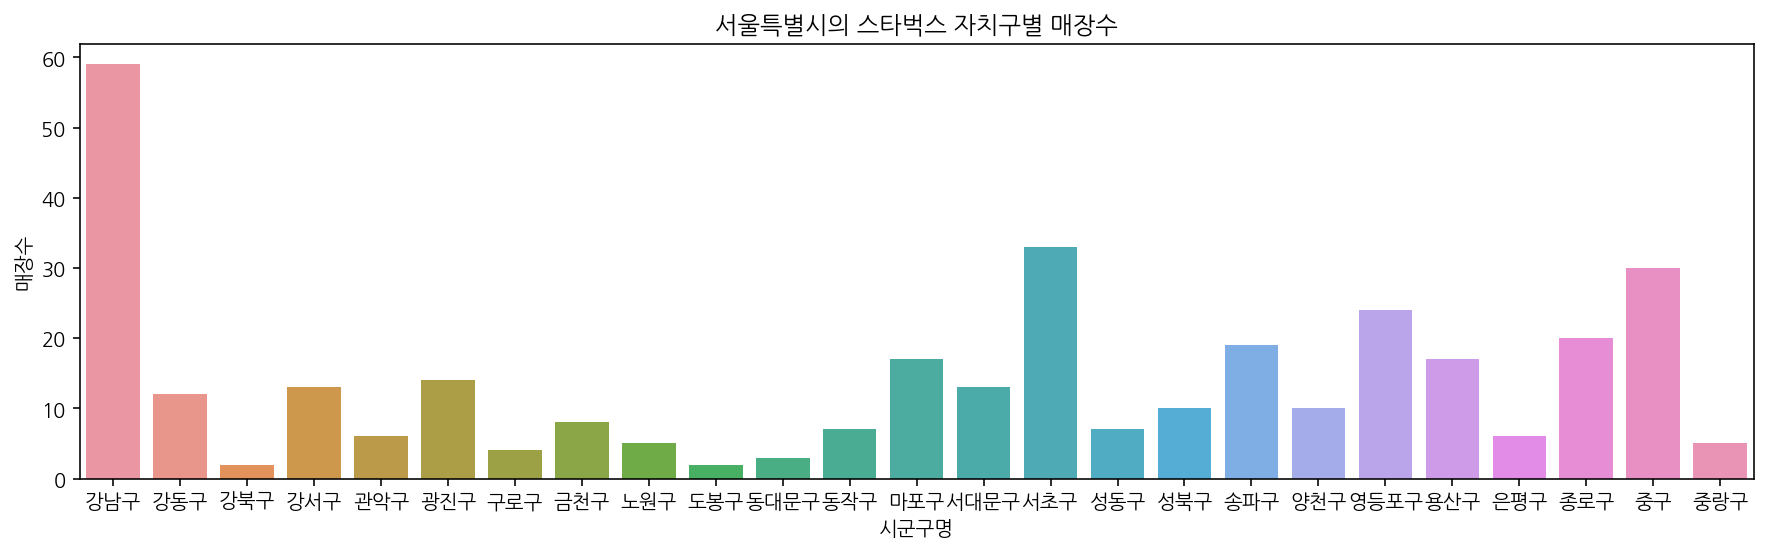

In [41]:
# 위에서 구한 결과를 시군구명, 상호수로 barplot을 그립니다.
plt.figure(figsize=(15, 4))
plt.title('서울특별시의 스타벅스 자치구별 매장수')
sns.barplot(data=g_starbucks_seoul,x="시군구명", y="매장수")

<AxesSubplot:title={'center':'부산광역시의 스타벅스 자치구별 매장수'}, xlabel='시군구명', ylabel='매장수'>

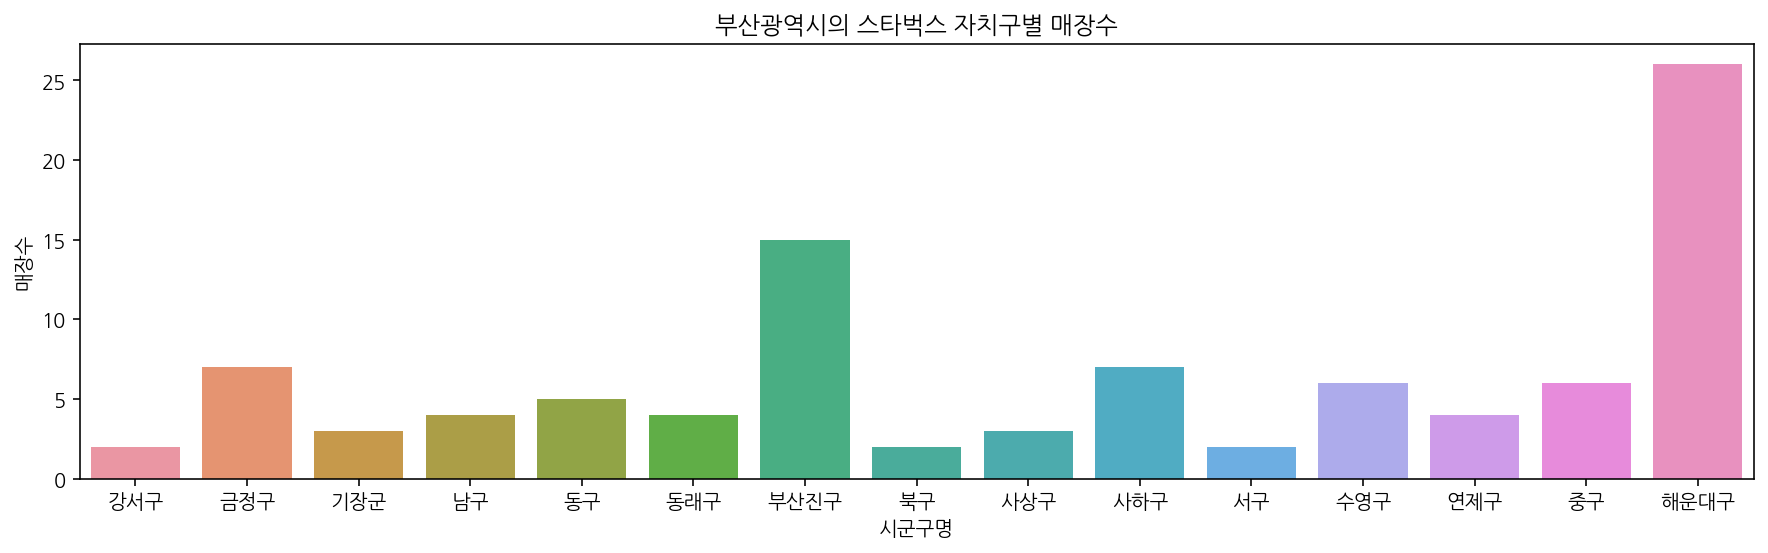

In [42]:
plt.figure(figsize=(15, 4))
plt.title('부산광역시의 스타벅스 자치구별 매장수')
sns.barplot(data=g_starbucks_busan,x="시군구명", y="매장수")